# Bank Marketing Prediction Project
**Objective:** Build a machine learning model to predict whether a client will subscribe to a term deposit.

## Step 1: Data Loading
Load the dataset and inspect its structure.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pickle

# Load the dataset
data = pd.read_csv('bank-additional/bank-additional.csv', sep=';')

# Inspect the data
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


## Step 2: Data Cleaning
Handle missing values, check for duplicates, and ensure data types are correct.

In [2]:
# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print(data.duplicated().sum())

# Display data types
print(data.dtypes)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
0
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


## Step 3: Data Preprocessing
Encode categorical variables and scale numerical features.

In [3]:
# Encode categorical variables using One-Hot Encoding
categorical_columns = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Scale numerical features
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Define the preprocessed dataset (X for features, y for target)
X = data.drop('y_yes', axis=1)  # Features
y = data['y_yes']               # Target variable

# Save feature names after preprocessing
feature_names = X.columns
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)

print("Feature names saved to 'feature_names.pkl'")

Feature names saved to 'feature_names.pkl'


## Step 4: Exploratory Data Analysis (EDA)
Visualize distributions, correlations, and relationships in the data.

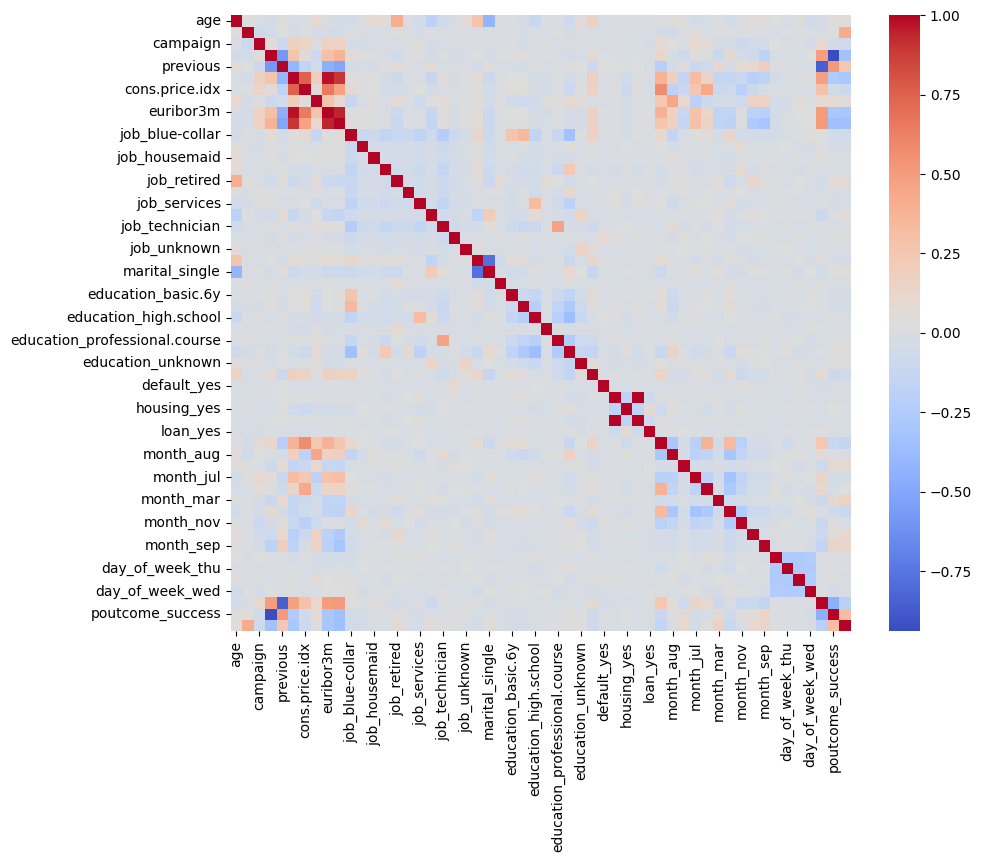

In [4]:
# Example EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.show()

## Step 5: Feature Selection
Use feature selection techniques to choose relevant features.

In [5]:
# Example: Feature selection using correlation threshold
correlation_threshold = 0.1
correlation_matrix = data.corr()
relevant_features = correlation_matrix.index[correlation_matrix['y_yes'].abs() > correlation_threshold]
print(relevant_features)

Index(['duration', 'pdays', 'previous', 'emp.var.rate', 'euribor3m',
       'nr.employed', 'contact_telephone', 'month_dec', 'month_mar',
       'month_may', 'month_oct', 'month_sep', 'poutcome_nonexistent',
       'poutcome_success', 'y_yes'],
      dtype='object')


## Step 6: Model Selection
Train and evaluate multiple models.

In [6]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Train-test split
X = data.drop('y_yes', axis=1)
y = data['y_yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred))

Logistic Regression:
              precision    recall  f1-score   support

       False       0.93      0.97      0.95       732
        True       0.61      0.41      0.49        92

    accuracy                           0.91       824
   macro avg       0.77      0.69      0.72       824
weighted avg       0.89      0.91      0.90       824



## Step 7: Hyperparameter Tuning
Optimize the hyperparameters of the best-performing model.

In [7]:
# Hyperparameter tuning example using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


## Step 8: Evaluation
Evaluate the final model on the test set.

In [8]:
# Evaluate final model
final_model = grid_search.best_estimator_
y_pred_final = final_model.predict(X_test)
print("Final Model:")
print(classification_report(y_test, y_pred_final))

Final Model:
              precision    recall  f1-score   support

       False       0.93      0.97      0.95       732
        True       0.61      0.38      0.47        92

    accuracy                           0.90       824
   macro avg       0.77      0.68      0.71       824
weighted avg       0.89      0.90      0.89       824



In [9]:
import pickle

# Example: Assume 'final_model' is your trained model
final_model = grid_search.best_estimator_  # Or any trained model

# Save the model to a file
with open('final_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)